# Imports

In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import random
from math import sqrt
from skimage import io, color, data, transform
from skimage.morphology import skeletonize
from skimage.util import invert
from PIL import Image

# Voronoi diagram of 100 random points

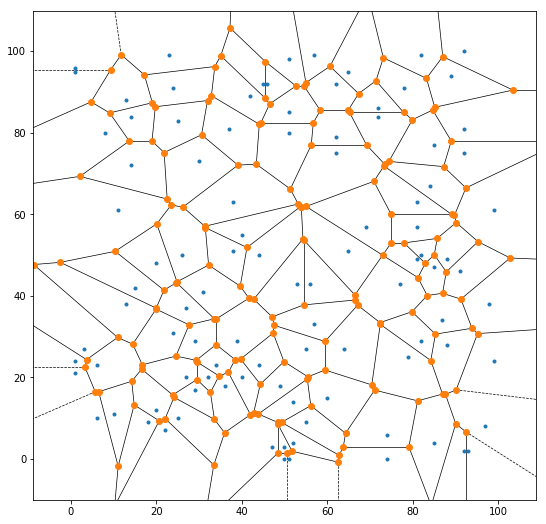

In [4]:
points = np.array([[random.randint(0,100), random.randint(0,100)] for i in range(100)])
points = sorted(points, key = lambda x: (x[0], x[1]))
#points = np.array([[random.randint(120,150), random.randint(40,250)] for i in range(10)])
vor = Voronoi(points)
voronoi_plot_2d(vor, line_width = 0.7, show_vertices = True, show_points = True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [272]:
vor.ridge_vertices

[[-1, 17],
 [-1, 18],
 [17, 18],
 [-1, 2],
 [2, 19],
 [18, 19],
 [21, 22],
 [21, 23],
 [22, 25],
 [23, 26],
 [25, 26],
 [1, 5],
 [1, 8],
 [5, 6],
 [6, 28],
 [8, 29],
 [28, 29],
 [33, 34],
 [33, 35],
 [34, 36],
 [35, 36],
 [9, 33],
 [9, 31],
 [31, 32],
 [32, 34],
 [37, 39],
 [37, 38],
 [38, 39],
 [2, 37],
 [3, 20],
 [3, 10],
 [10, 39],
 [19, 20],
 [12, 21],
 [12, 15],
 [15, 42],
 [23, 40],
 [40, 42],
 [44, 48],
 [44, 45],
 [45, 46],
 [46, 47],
 [47, 48],
 [4, 13],
 [4, 11],
 [11, 44],
 [13, 45],
 [12, 13],
 [22, 46],
 [14, 24],
 [14, 47],
 [24, 25],
 [3, 41],
 [10, 50],
 [41, 43],
 [43, 51],
 [50, 51],
 [-1, 58],
 [-1, 57],
 [57, 59],
 [58, 59],
 [17, 57],
 [14, 49],
 [24, 60],
 [49, 62],
 [60, 62],
 [26, 63],
 [60, 67],
 [63, 67],
 [61, 62],
 [61, 66],
 [66, 67],
 [9, 27],
 [27, 68],
 [35, 69],
 [68, 69],
 [77, 79],
 [77, 78],
 [78, 80],
 [79, 82],
 [80, 81],
 [81, 82],
 [8, 79],
 [29, 30],
 [30, 77],
 [30, 36],
 [32, 78],
 [31, 80],
 [0, 1],
 [0, 82],
 [-1, 81],
 [27, 71],
 [-1, 71],


In [85]:
vor.points[:5]

array([[  22.,  195.],
       [  78.,   34.],
       [ 135.,   98.],
       [ 167.,  267.],
       [ 170.,  262.]])

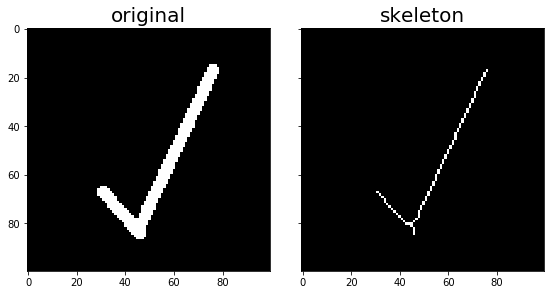

In [5]:
# invert image
image = invert(color.rgb2gray(io.imread('./img/cont/check.png')).round())

# perform skeletonization
skeleton_weyes = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton_weyes, cmap=plt.cm.gray)
#ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


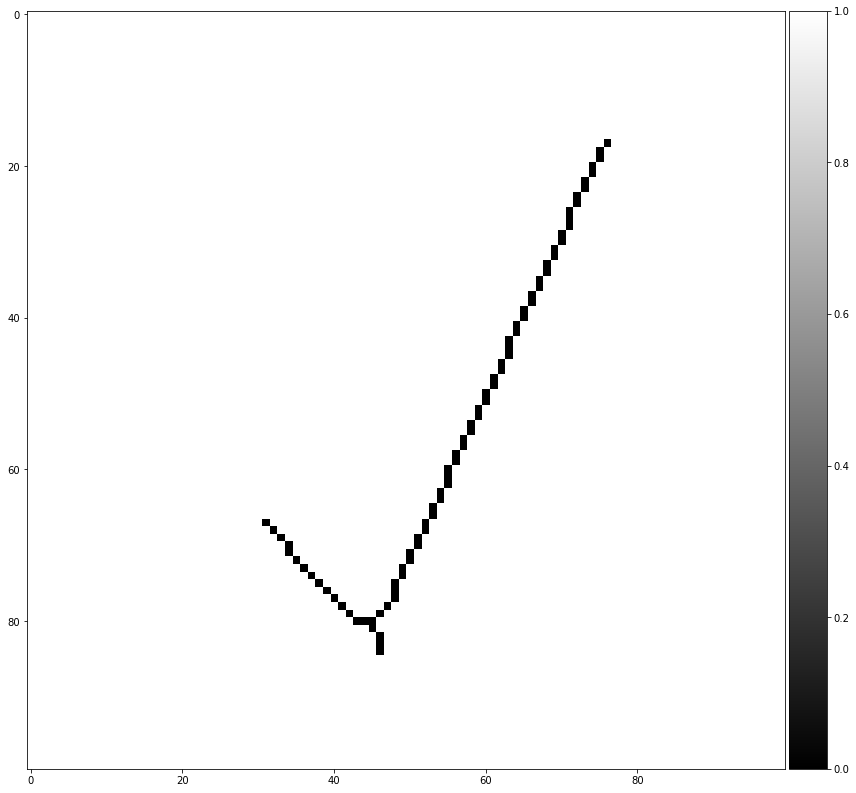

In [28]:
io.imshow(invert(skeleton_weyes), cmap=plt.cm.gray)
plt.show()

In [94]:
skeleton

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [95]:
skeleton.mean()

0.0066

In [96]:
skeleton.shape

(100, 100)

In [97]:
image.shape

(100, 100)

In [16]:
sk_pts = [[np.where(skeleton_weyes == True)[0][i], np.where(skeleton_weyes == True)[1][i]] for i in range(len(np.where(skeleton_weyes == True)[0]))]

In [157]:
sk_pts

[[6, 99],
 [6, 100],
 [6, 101],
 [6, 102],
 [6, 103],
 [7, 97],
 [7, 98],
 [7, 104],
 [7, 105],
 [8, 95],
 [8, 96],
 [8, 106],
 [9, 94],
 [9, 107],
 [10, 93],
 [10, 107],
 [11, 92],
 [11, 107],
 [12, 92],
 [12, 108],
 [13, 91],
 [13, 108],
 [14, 90],
 [14, 108],
 [15, 90],
 [15, 108],
 [16, 90],
 [16, 108],
 [17, 89],
 [17, 108],
 [18, 89],
 [18, 108],
 [19, 89],
 [19, 107],
 [20, 88],
 [20, 107],
 [21, 88],
 [21, 107],
 [21, 129],
 [21, 130],
 [21, 131],
 [22, 88],
 [22, 107],
 [22, 127],
 [22, 128],
 [22, 132],
 [22, 133],
 [22, 134],
 [23, 27],
 [23, 28],
 [23, 29],
 [23, 30],
 [23, 31],
 [23, 32],
 [23, 33],
 [23, 34],
 [23, 35],
 [23, 88],
 [23, 106],
 [23, 124],
 [23, 125],
 [23, 126],
 [23, 135],
 [24, 25],
 [24, 26],
 [24, 36],
 [24, 37],
 [24, 38],
 [24, 39],
 [24, 40],
 [24, 41],
 [24, 42],
 [24, 43],
 [24, 44],
 [24, 45],
 [24, 46],
 [24, 47],
 [24, 48],
 [24, 49],
 [24, 50],
 [24, 51],
 [24, 52],
 [24, 53],
 [24, 54],
 [24, 55],
 [24, 56],
 [24, 57],
 [24, 58],
 [24, 88],
 

In [17]:
def eucl_dist(pt1, pt2):
    return sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)

def fitness_function(voronoi, skeleton_points):
    total = 0
    closest_sk_pt = [sorted(skeleton_points, key=lambda x: eucl_dist(point, x))[0] for point in voronoi.vertices]
    for i in range(len(voronoi.vertices)):
        total += eucl_dist(voronoi.vertices[i], closest_sk_pt[i])
    return total

In [10]:
fitness_function(vor, sk_pts_weyes)

6859.434646286964

In [11]:
vor.vertices

array([[  4.00000000e+01,   1.30700000e+03],
       [  1.51214286e+02,   9.05000000e+01],
       [  7.09418605e+01,   6.81162791e+01],
       [  5.37894737e+01,   6.19315789e+01],
       [  4.12307692e+01,   5.18846154e+01],
       [  2.59500000e+02,   4.25000000e+01],
       [  1.02855030e+02,   4.93106509e+01],
       [  9.53260870e+01,   5.33260870e+01],
       [  9.52333333e+01,   3.07666667e+01],
       [  9.02173913e+01,   1.69728261e+01],
       [  8.77173913e+01,   1.58478261e+01],
       [ -4.36136364e+01,   5.59090909e+01],
       [  4.00000000e+01,   1.82500000e+02],
       [  6.95000000e+01,   2.74500000e+02],
       [  1.03500000e+02,   9.05000000e+01],
       [  8.51973684e+01,   8.62763158e+01],
       [  8.70789474e+01,   9.87105263e+01],
       [  8.32631579e+01,   9.33684211e+01],
       [  7.33214286e+01,   7.18839286e+01],
       [  7.34748201e+01,   7.23057554e+01],
       [  8.47222222e+01,   8.56111111e+01],
       [  7.99736842e+01,   8.32368421e+01],
       [  

generate population, choose best, create offspring, mutate, repeat

In [18]:
def population(n_points, pop_size, fig_width, fig_height):
    pop = []
    for i in range(pop_size):
        points = np.array([[random.randint(0,fig_width), random.randint(0,fig_height)] for i in range(n_points)])
#         points = sorted(points, key = lambda x: (x[0], x[1]))
        pop.append(Voronoi(points))
    return pop

# def random_best(n, n_points, fig_width, fig_height):
#     points = np.array([[random.randint(0,fig_width), random.randint(0,fig_height)] for i in range(n_points)])
#     current_best_vor = Voronoi(points)
#     current_best_fit = fitness_function(current_best_vor, sk_pts)
#     for i in range(n):
#         points = np.array([[random.randint(0,fig_width), random.randint(0,fig_height)] for i in range(n_points)])
#         current_vor = Voronoi(points)
#         current_fit = fitness_function(current_vor, sk_pts)
#         if current_fit < current_best_fit:
#             current_best_vor = current_vor
#             current_best_fit = current_fit
#     return current_best_vor, current_best_fit

def gen_best(n_generations, n_points, pop=[], pop_size=30, fig_width=100, fig_height=100, mut_rate=0.1, mut_step=3.0):
    if not pop:
        pop = population(n_points, pop_size, fig_width, fig_height)
    n_chosen = 5
    chosen = sorted(pop, key=lambda x: fitness_function(x, sk_pts))[:n_chosen]
    best_score = fitness_function(chosen[0], sk_pts)
    
    for g in range(n_generations):
        print(g, best_score, end='\r')
        new_gen = []
        offspring_points = np.array([chosen[random.choice(range(n_chosen))].points[i] for i in range(n_points)])
#         offspring_points = sorted(offspring_points, key = lambda x: (x[0], x[1]))
        offspring = Voronoi(offspring_points)
    
        for o in range(pop_size):
            # Select points for mutation
            mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
            mut_points = np.array([[point[0] + random.uniform(-mut_step, mut_step),
                                    point[1] + random.uniform(-mut_step, mut_step)] 
                                   if i in mut_indices
                                   else point
                                   for i, point in enumerate(offspring.points)])
#             mut_points = sorted(mut_points, key = lambda x: (x[0], x[1]))
            new_gen.append(Voronoi(mut_points))
        pop = new_gen
        chosen = sorted(pop, key=lambda x: fitness_function(x, sk_pts))[:n_chosen]
        best_score = fitness_function(chosen[0], sk_pts)
    return chosen[0]

In [31]:
mygen = gen_best(200, 30, fig_height=100, fig_width=100)

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


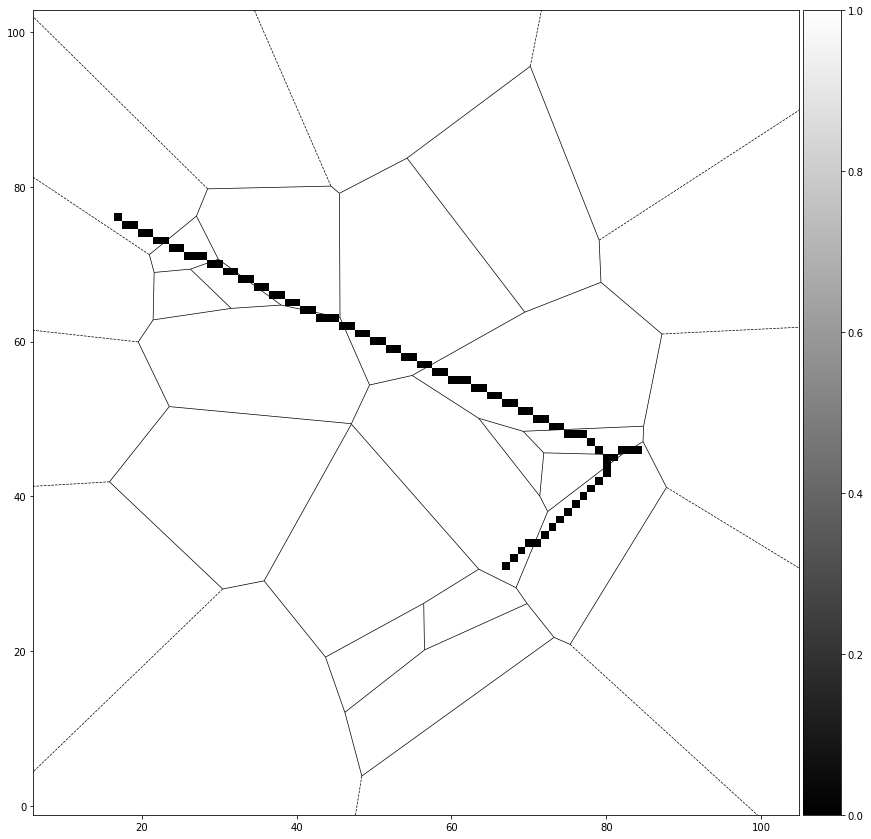

In [34]:
voronoi_plot_2d(mygen, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_weyes[:, ::-1]), 90), cmap=plt.cm.gray)
plt.show()

In [13]:
def newpop(diagram, pop_size=30, mut_rate=0.1, mut_step=3.0):
    n_points = len(diagram.points)
    pop = []
    for o in range(pop_size):
        # Select points for mutation
        mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
        mut_points = np.array([[point[0] + random.uniform(-mut_step, mut_step),
                                point[1] + random.uniform(-mut_step, mut_step)] 
                                if i in mut_indices
                                else point
                                for i, point in enumerate(diagram.points)])
        pop.append(Voronoi(mut_points))
    return pop

In [167]:
new_peppa_pop = newpop(mygen)

In [171]:
mygen1 = gen_best(n_generations=200, n_points=100, pop=new_peppa_pop, fig_width=150, fig_height=150)

In [91]:
voronoi_plot_2d(mygen1, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

NameError: name 'mygen1' is not defined

In [180]:
mygen1.ridge_dict

{(0, 4): [12, 53],
 (0, 13): [13, 59],
 (0, 69): [59, 60],
 (0, 79): [12, 60],
 (0, 80): [13, 52],
 (1, 15): [163, 164],
 (1, 54): [139, 164],
 (1, 57): [44, 163],
 (2, 36): [108, 109],
 (2, 78): [109, 134],
 (3, 9): [7, 37],
 (3, 31): [8, 36],
 (3, 67): [7, 9],
 (3, 68): [36, 37],
 (3, 96): [8, 9],
 (4, 7): [82, 83],
 (4, 79): [12, 82],
 (5, 12): [149, 151],
 (5, 76): [148, 149],
 (5, 77): [150, 151],
 (5, 94): [148, 150],
 (6, 15): [177, 178],
 (6, 54): [176, 178],
 (6, 95): [176, 177],
 (7, 8): [87, 88],
 (7, 25): [88, 101],
 (7, 88): [99, 101],
 (7, 91): [81, 99],
 (8, 48): [120, 121],
 (8, 62): [140, 141],
 (8, 95): [104, 141],
 (9, 23): [5, 38],
 (9, 67): [6, 7],
 (9, 68): [37, 38],
 (10, 77): [46, 84],
 (10, 84): [45, 112],
 (10, 94): [84, 113],
 (11, 48): [162, 183],
 (11, 98): [161, 179],
 (12, 45): [111, 155],
 (13, 58): [62, 63],
 (13, 69): [59, 63],
 (13, 76): [11, 62],
 (13, 80): [11, 13],
 (16, 14): [18, 67],
 (16, 17): [31, 65],
 (16, 72): [31, 54],
 (17, 32): [32, 69],


# Optimize: int everything? play with params? score for top pts?

# Peppa over random 100-point diagram

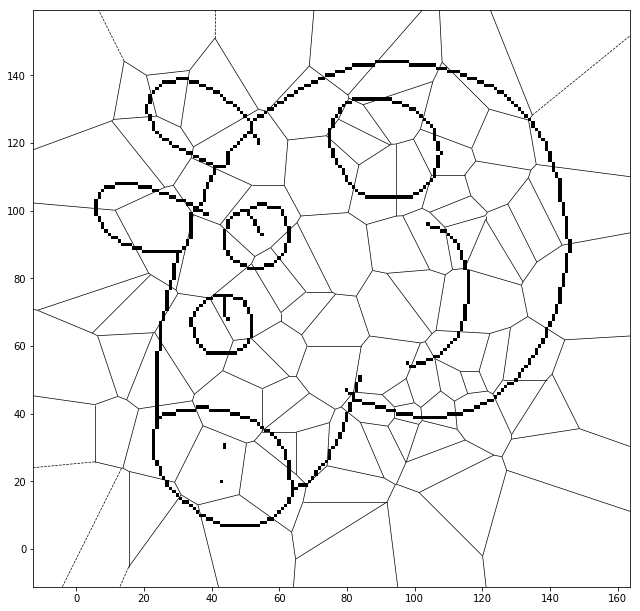

In [190]:
points = np.array([[random.randint(0,150), random.randint(0,150)] for i in range(100)])
points = sorted(points, key = lambda x: (x[0], x[1]))
#points = np.array([[random.randint(120,150), random.randint(40,250)] for i in range(10)])
vor = Voronoi(points)
voronoi_plot_2d(vor, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

# int everything

In [14]:
def eucl_dist_int(pt1, pt2):
    return int(sqrt((int(pt1[0]) - int(pt2[0]))**2 + (int(pt1[1]) - int(pt2[1]))**2))

def fitness_function_int(voronoi, skeleton_points):
    total = 0
    closest_sk_pt = [sorted(skeleton_points, key=lambda x: eucl_dist_int(point, x))[0] for point in voronoi.vertices]
    for i in range(len(voronoi.vertices)):
        total += eucl_dist_int(voronoi.vertices[i], closest_sk_pt[i])
    return total

def population_int(n_points, pop_size, fig_width, fig_height):
    pop = []
    for i in range(pop_size):
        points = np.array([[random.randint(0,fig_width), random.randint(0,fig_height)] for i in range(n_points)])
#         points = sorted(points, key = lambda x: (x[0], x[1]))
        pop.append(Voronoi(points))
    return pop

def gen_best_int(n_generations, n_points, pop=[], pop_size=30, fig_width=100, fig_height=100, mut_rate=0.1, mut_step=3):
    if not pop:
        pop = population_int(n_points, pop_size, fig_width, fig_height)
    n_chosen = 5
    chosen = sorted(pop, key=lambda x: fitness_function_int(x, sk_pts))[:n_chosen]
    best_score = fitness_function_int(chosen[0], sk_pts)
    
    for g in range(n_generations):
        print(g, best_score, end='\r')
        new_gen = []
        offspring_points = np.array([chosen[random.choice(range(n_chosen))].points[i] for i in range(n_points)])
#         offspring_points = sorted(offspring_points, key = lambda x: (x[0], x[1]))
        offspring = Voronoi(offspring_points)
    
        for o in range(pop_size):
            # Select points for mutation
            mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
            mut_points = np.array([[point[0] + random.choice(range(-mut_step, mut_step+1)),
                                    point[1] + random.choice(range(-mut_step, mut_step+1))] 
                                   if i in mut_indices
                                   else point
                                   for i, point in enumerate(offspring.points)])
#             mut_points = sorted(mut_points, key = lambda x: (x[0], x[1]))
            new_gen.append(Voronoi(mut_points))
        pop = new_gen
        chosen = sorted(pop, key=lambda x: fitness_function_int(x, sk_pts))[:n_chosen]
        best_score = fitness_function_int(chosen[0], sk_pts)
    return chosen[0]

In [192]:
mygen_int = gen_best_int(200, 100, fig_height=150, fig_width=150)

KeyboardInterrupt: 

# Consider top points

In [38]:
def fitness_function_top(voronoi, skeleton_points, top_rate=1):
#     total = 0
    vertices = list(list(v) for v in voronoi.vertices)
#     closest_sk_pts = {ind: sorted(skeleton_points, key=lambda x: eucl_dist(vertices[ind], x))[0]
#                       for ind in range(len(vertices))}

    skeleton_distances = [sorted([eucl_dist(v, sk_point) for sk_point in skeleton_points])[0] for v in vertices]
    
#     top_vertices = sorted(range(len(vertices)), key=lambda x:
#                           eucl_dist(closest_sk_pts[x], vertices[x]))
    
    top_n = int(len(vertices) * top_rate)
#     top_distances = sorted([eucl_dist(closest_sk_pts[i], v) for i, v in enumerate(vertices)])
    top_distances = sorted(skeleton_distances)
    total = sum(top_distances[:top_n])
    
#     for i in range(top_n):
#         total += eucl_dist(vertices[top_vertices[i]], closest_sk_pts[top_vertices[i]])
    return total

def gen_best_top(n_generations, n_points, pop=[], pop_size=30, fig_width=100, fig_height=100, mut_rate=0.1, mut_step=3):
    if not pop:
        pop = population(n_points, pop_size, fig_width, fig_height)
    n_chosen = 5
    chosen = sorted(pop, key=lambda x: fitness_function_top(x, sk_pts))[:n_chosen]
    best_score = fitness_function_top(chosen[0], sk_pts)
    
    for g in range(n_generations):
        try:
            print(g, best_score, end='\r')
            new_gen = []
            offspring_points = np.array([chosen[random.choice(range(n_chosen))].points[i] for i in range(n_points)])
            offspring = Voronoi(offspring_points)

            for o in range(pop_size):
                # Select points for mutation
                mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
                mut_points = np.array([[point[0] + random.choice(range(-mut_step, mut_step+1)),
                                        point[1] + random.choice(range(-mut_step, mut_step+1))] 
                                       if i in mut_indices
                                       else point
                                       for i, point in enumerate(offspring.points)])
                new_gen.append(Voronoi(mut_points))
            pop = new_gen
            chosen = sorted(pop, key=lambda x: fitness_function_top(x, sk_pts))[:n_chosen]
            best_score = fitness_function_top(chosen[0], sk_pts)
        except KeyboardInterrupt:
            return chosen[0]
    return chosen[0]

In [230]:
mygen_top = gen_best_top(200, 100, fig_height=150, fig_width=150)

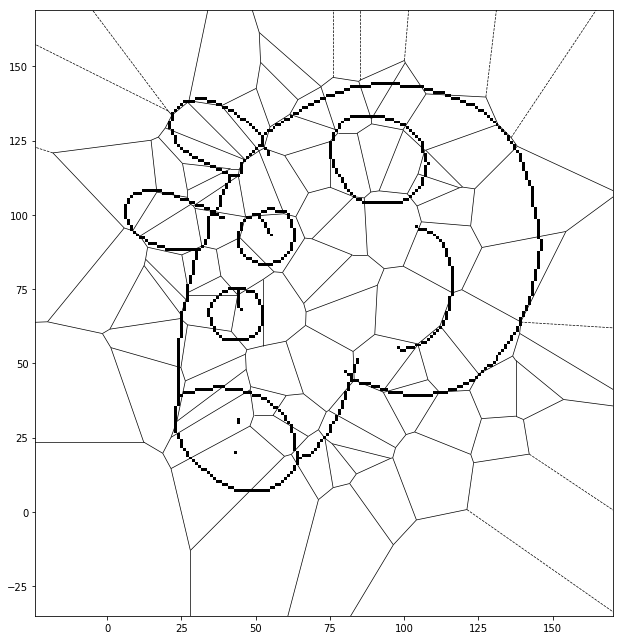

In [228]:
voronoi_plot_2d(mygen_top, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

In [231]:
%%time
overnight_peppa = gen_best_top(n_generations=1000, n_points=120, fig_height=150, fig_width=150, pop_size=50)

Wall time: 4h 24min 8s


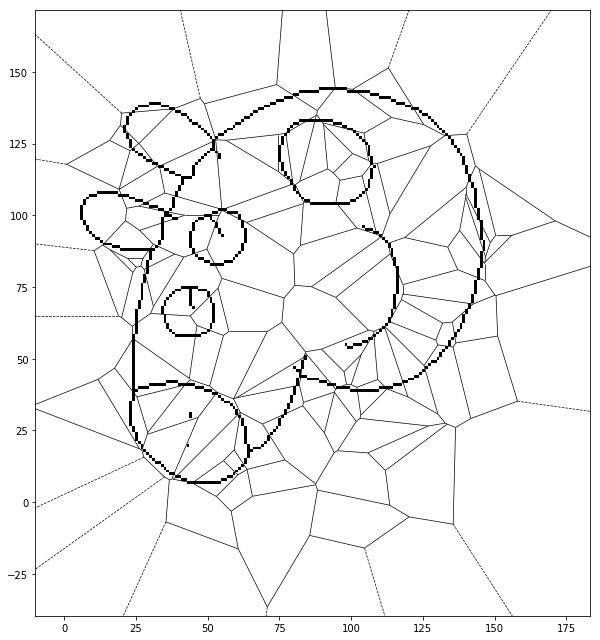

In [237]:
voronoi_plot_2d(overnight_peppa, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

In [240]:
%%time
peppa_100pts_pt9rate = gen_best_top(n_generations=300, mut_rate=0.15, n_points=100, fig_height=150, fig_width=150, mut_step=5)

Wall time: 58min 24s4


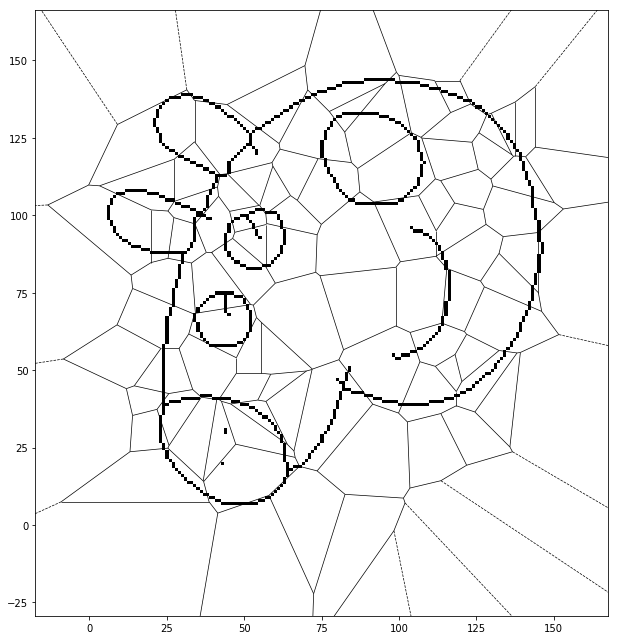

In [241]:
voronoi_plot_2d(peppa_100pts_pt9rate, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

In [ ]:
def population_grid(n_points, pop_size, fig_width, fig_height):
    pop = []
    for i in range(pop_size):
        points = np.array([[random.randint(0,fig_width), random.randint(0,fig_height)] for i in range(n_points)])
        pop.append(Voronoi(points))
    return pop

In [245]:
%%time
peppa_120pts_1rate = gen_best_top(n_generations=400, mut_rate=0.1, n_points=120, fig_height=150, fig_width=150, mut_step=3)

Wall time: 1h 27min 3s


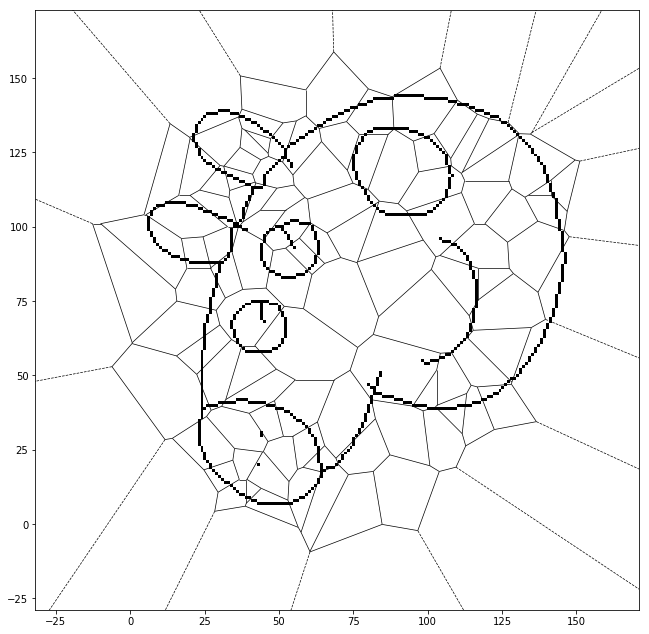

In [268]:
voronoi_plot_2d(peppa_120pts_1rate, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_weyes[:, ::-1]), 90))
plt.show()

In [250]:
peppa_120pts_1rate_cont = gen_best_top(n_generations=200, n_points=120, fig_height=150, fig_width=150,
                                       pop=newpop(diagram=peppa_120pts_1rate, mut_rate=0.1, mut_step=3, pop_size=30))

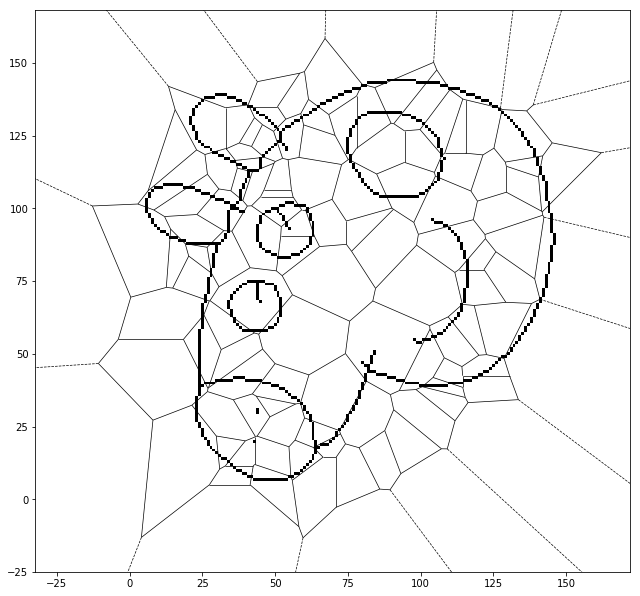

In [251]:
voronoi_plot_2d(peppa_120pts_1rate_cont, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

In [265]:
# 5 best at each step
peppa_120pts_1rate_cont2 = gen_best_top(n_generations=200, n_points=120, fig_height=150, fig_width=150,
                                       pop=newpop(diagram=peppa_120pts_1rate, mut_rate=0.1, mut_step=3, pop_size=30))

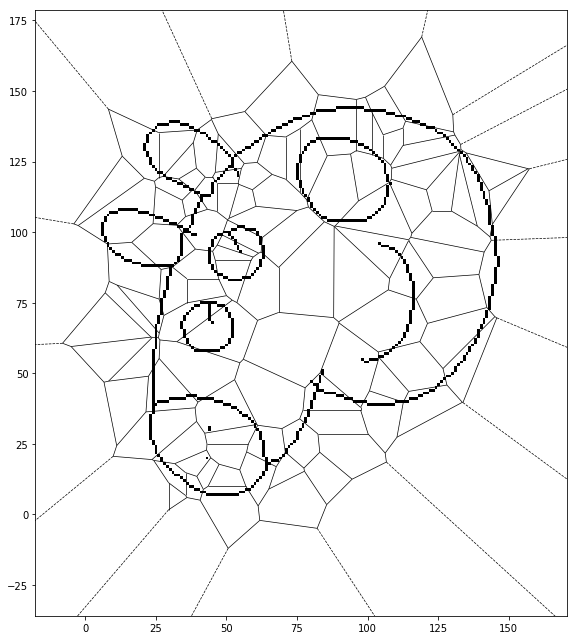

In [266]:
voronoi_plot_2d(peppa_120pts_1rate_cont2, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_weyes[:, ::-1]), 90))
plt.show()

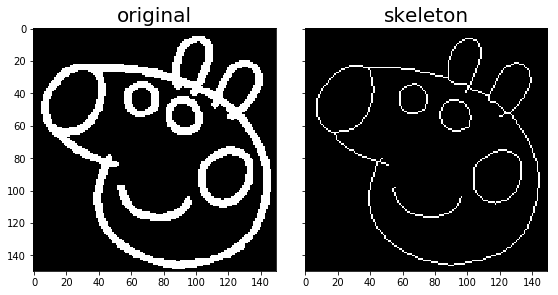

In [92]:
# invert image
image = invert(color.rgb2gray(io.imread('peppa_noeyes.png')).round())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
#ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

sk_pts = [[np.where(skeleton == True)[0][i], np.where(skeleton == True)[1][i]] for i in range(len(np.where(skeleton == True)[0]))]

In [257]:
peppa_noeyes_100pts_1rate_10chosen = gen_best_top(n_generations=300, mut_rate=0.1, n_points=100, fig_height=150,
                                                  fig_width=150, mut_step=3)

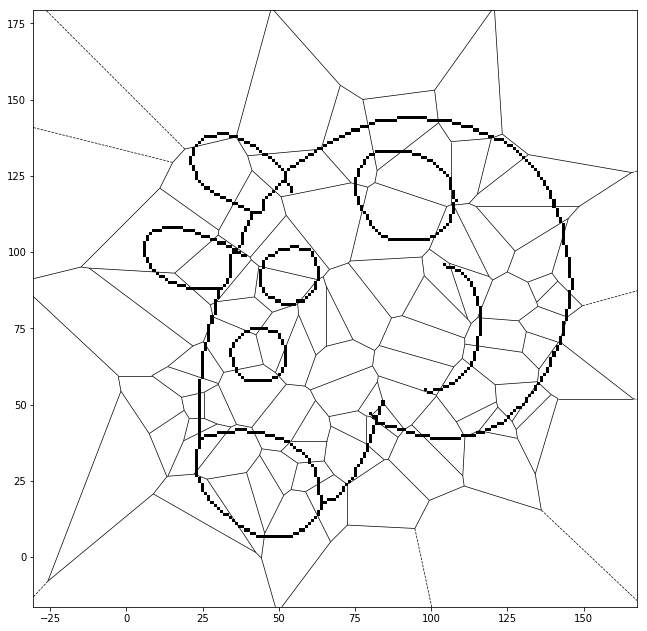

In [258]:
voronoi_plot_2d(peppa_noeyes_100pts_1rate_10chosen, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton[:, ::-1]), 90))
plt.show()

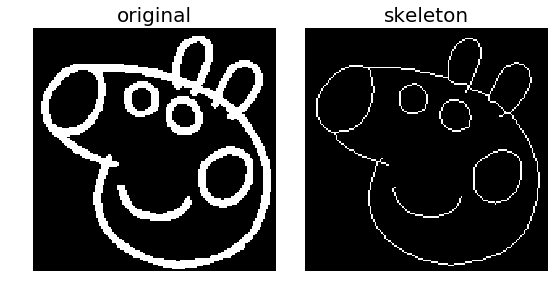

In [85]:
# invert image
image = invert(color.rgb2gray(io.imread('peppa_noeyes.png')).round())

# perform skeletonization
skeleton_peppa = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton_peppa, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

sk_pts = [[np.where(skeleton_peppa == True)[0][i], np.where(skeleton_peppa == True)[1][i]] for i in range(len(np.where(skeleton_peppa == True)[0]))]

In [305]:
check = gen_best_top(n_generations=300, mut_rate=0.1, n_points=50, fig_height=100, fig_width=100, mut_step=3)

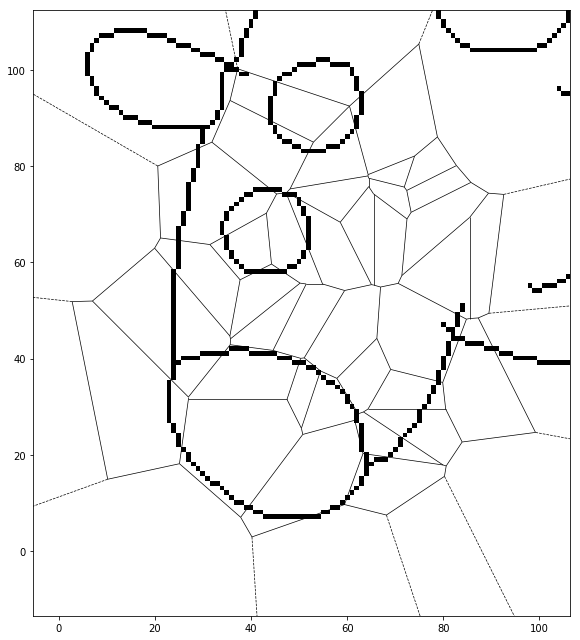

In [323]:
voronoi_plot_2d(check, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

In [35]:
def population_on_skeleton(n_points, pop_size, fig_width, fig_height, skeleton_points):
    pop = []
#     skeleton_indices = np.random.choice(range(len(skeleton_points)), n_points, replace=False)
    for i in range(pop_size):
        points = np.array(sorted(skeleton_points, key=lambda x: x[0] + x[1])[0::int(len(sk_pts)/n_points)])
        pop.append(Voronoi(points))
    return pop

def gen_best_from_sk(n_generations, n_points, pop=[], pop_size=30, fig_width=100, fig_height=100,
                     mut_rate=0.1, mut_step=3, skeleton_points=sk_pts):
    if not pop:
        pop = population_on_skeleton(n_points, pop_size, fig_width, fig_height, skeleton_points)
    n_chosen = 5
    chosen = sorted(pop, key=lambda x: fitness_function_top(x, skeleton_points))[:n_chosen]
    best_score = fitness_function_top(chosen[0], skeleton_points)
    
    for g in range(n_generations):
        try:
            print(g, best_score, end='\r')
            new_gen = []
            offspring_points = np.array([chosen[random.choice(range(n_chosen))].points[i] for i in range(n_points)])
            offspring = Voronoi(offspring_points)

            for o in range(pop_size):
                # Select points for mutation
                mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
                mut_points = np.array([[point[0] + random.choice(range(-mut_step, mut_step+1)),
                                        point[1] + random.choice(range(-mut_step, mut_step+1))] 
                                       if i in mut_indices
                                       else point
                                       for i, point in enumerate(offspring.points)])
                new_gen.append(Voronoi(mut_points))
            pop = new_gen
            chosen = sorted(pop, key=lambda x: fitness_function_top(x, skeleton_points))[:n_chosen]
            best_score = fitness_function_top(chosen[0], skeleton_points)
        except KeyboardInterrupt:
            return chosen[0]
    return chosen[0]

In [39]:
check_on_skeleton = gen_best_from_sk(n_generations=300, n_points=30, fig_height=100, fig_width=100)

C:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


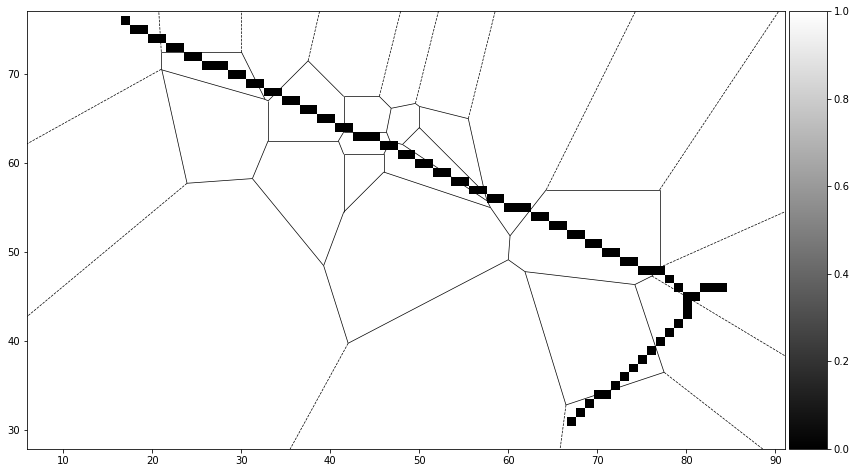

In [45]:
voronoi_plot_2d(check_on_skeleton, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_weyes[:, ::-1]), 90), cmap=plt.cm.gray)
plt.show()

In [328]:
peppa_on_skeleton = gen_best_from_sk(n_generations=300, n_points=100, fig_height=150, fig_width=150)

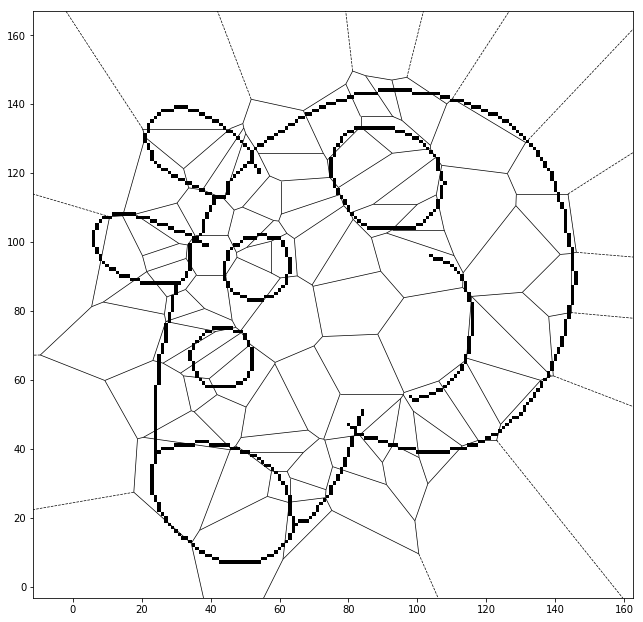

In [329]:
voronoi_plot_2d(peppa_on_skeleton, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

In [330]:
len(sk_pts)

817

In [333]:
len(sk_pts[0::int(len(sk_pts)/100)])

103

In [338]:
sk_pts

[[6, 99],
 [6, 100],
 [6, 101],
 [6, 102],
 [6, 103],
 [7, 97],
 [7, 98],
 [7, 104],
 [7, 105],
 [8, 95],
 [8, 96],
 [8, 106],
 [9, 94],
 [9, 107],
 [10, 93],
 [10, 107],
 [11, 92],
 [11, 107],
 [12, 92],
 [12, 108],
 [13, 91],
 [13, 108],
 [14, 90],
 [14, 108],
 [15, 90],
 [15, 108],
 [16, 90],
 [16, 108],
 [17, 89],
 [17, 108],
 [18, 89],
 [18, 108],
 [19, 89],
 [19, 107],
 [20, 88],
 [20, 107],
 [21, 88],
 [21, 107],
 [21, 129],
 [21, 130],
 [21, 131],
 [22, 88],
 [22, 107],
 [22, 127],
 [22, 128],
 [22, 132],
 [22, 133],
 [22, 134],
 [23, 27],
 [23, 28],
 [23, 29],
 [23, 30],
 [23, 31],
 [23, 32],
 [23, 33],
 [23, 34],
 [23, 35],
 [23, 88],
 [23, 106],
 [23, 124],
 [23, 125],
 [23, 126],
 [23, 135],
 [24, 25],
 [24, 26],
 [24, 36],
 [24, 37],
 [24, 38],
 [24, 39],
 [24, 40],
 [24, 41],
 [24, 42],
 [24, 43],
 [24, 44],
 [24, 45],
 [24, 46],
 [24, 47],
 [24, 48],
 [24, 49],
 [24, 50],
 [24, 51],
 [24, 52],
 [24, 53],
 [24, 54],
 [24, 55],
 [24, 56],
 [24, 57],
 [24, 58],
 [24, 88],
 

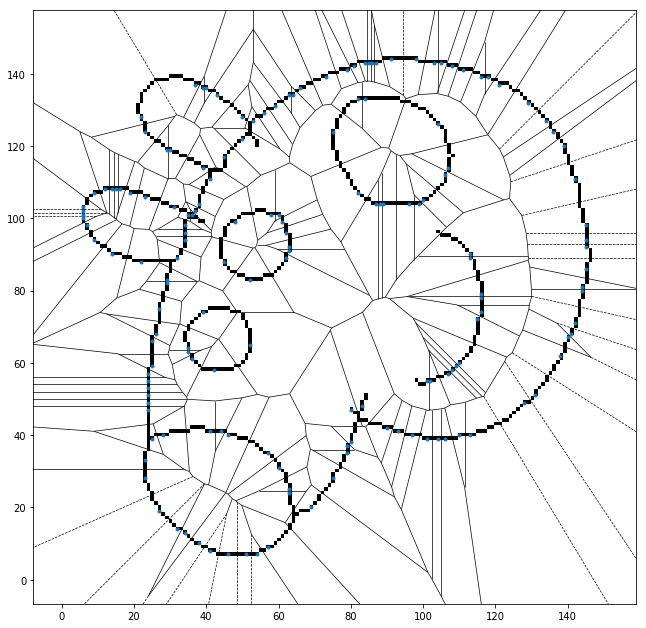

In [345]:
voronoi_plot_2d(Voronoi(sorted(sk_pts, key=lambda x: x[0] + x[1])[0::int(len(sk_pts)/150)]), line_width = 0.7, show_vertices = False, show_points = True)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

In [343]:
peppa_on_skeleton_intervals = gen_best_from_sk(n_generations=300, n_points=100, fig_height=150, fig_width=150)

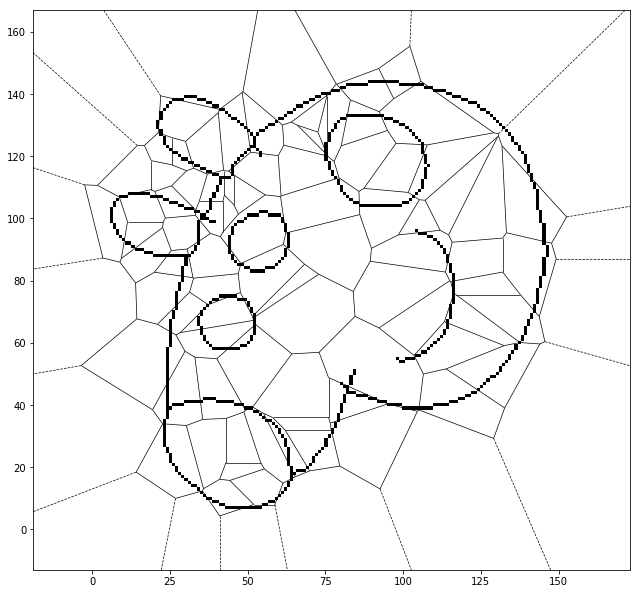

In [344]:
voronoi_plot_2d(peppa_on_skeleton_intervals, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

In [346]:
peppa_on_skeleton_intervals_1 = gen_best_from_sk(n_generations=400, n_points=100, fig_height=150, fig_width=150,
                                                 pop=newpop(peppa_on_skeleton_intervals))

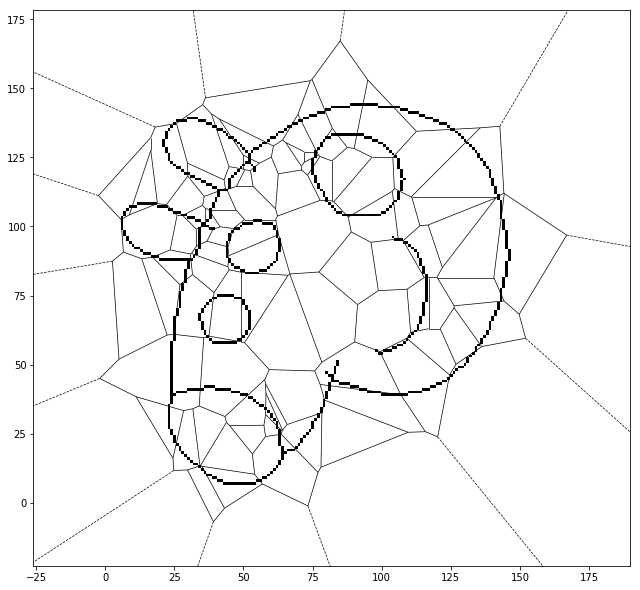

In [347]:
voronoi_plot_2d(peppa_on_skeleton_intervals_1, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

Get Voronoi diagram as numpy array

In [64]:
def get_voronoi_array(voronoi, line_width=3, size=(150,150), fname="vor.png"):
    p = voronoi_plot_2d(voronoi, line_width = 3, show_vertices = False, show_points = False)
    a = p.gca()
    a.set_xticks([]); a.set_yticks([])
    a.axis('off')
    a.set_frame_on(False)
    
    p.tight_layout()
    p.canvas.draw()
    

    # grab the pixel buffer and dump it into a numpy array
    read_voronoi = np.array(p.canvas.renderer._renderer)
    
#     p.savefig(fname, bbox_inches='tight', pad_inches=0)
    a.clear()
    plt.close(p)
    
#     # Read dumped diagram
#     read_voronoi = io.imread("vor.png", as_grey=True)
    read_voronoi = transform.resize(read_voronoi, size, mode="constant")
    read_voronoi = invert(color.rgb2gray(read_voronoi).round())
    
    return read_voronoi

In [ ]:
p.ca

In [520]:
plt.close('all')

In [56]:
%%time
read_voronoi = get_voronoi_array(peppa_intersect)

Wall time: 174 ms


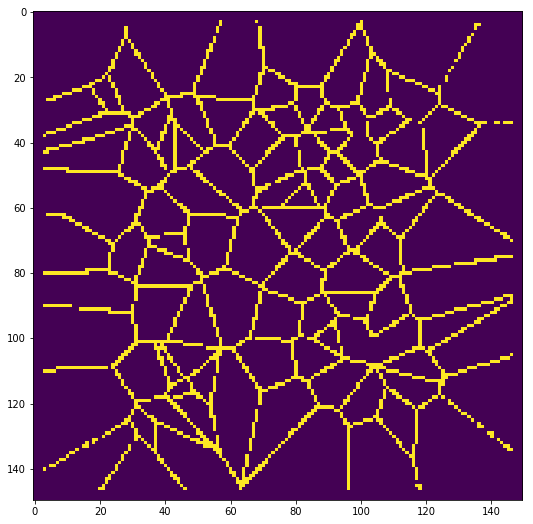

In [57]:
plt.imshow(read_voronoi)
plt.show()

In [476]:
image

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [483]:
np.sum(read_voronoi[np.where(image == 1)])

435.0

In [84]:
def fitness_function_intersect(voronoi, picture):
    voronoi_im = get_voronoi_array(voronoi)
    return np.sum(voronoi_im[np.where(picture == 1)])

In [77]:
fitness_function_intersect(peppa_intersect, skeleton_peppa)

145.0

In [86]:
def gen_best_intersect(n_generations, n_points, pop=[], pop_size=30, fig_width=100, fig_height=100,
                     mut_rate=0.1, mut_step=3, reference_image=image, skeleton_points=sk_pts):
    if not pop:
        pop = population_on_skeleton(n_points, pop_size, fig_width, fig_height, skeleton_points)
    n_chosen = 5
    chosen = sorted(pop, key=lambda x: fitness_function_intersect(x, reference_image), reverse=True)[:n_chosen]
    best_score = fitness_function_intersect(chosen[0], reference_image)
    
    for g in range(n_generations):
        try:
            print(g, best_score, end='\r')
            new_gen = []
            offspring_points = np.array([chosen[random.choice(range(n_chosen))].points[i] for i in range(n_points)])
            offspring = Voronoi(offspring_points)

            for o in range(pop_size):
                # Select points for mutation
                mut_indices = np.random.choice(range(n_points), int(n_points*mut_rate), replace=False)
                mut_points = np.array([[point[0] + random.choice(range(-mut_step, mut_step+1)),
                                        point[1] + random.choice(range(-mut_step, mut_step+1))] 
                                       if i in mut_indices
                                       else point
                                       for i, point in enumerate(offspring.points)])
                new_gen.append(Voronoi(mut_points))
            pop = new_gen
            chosen = sorted(pop, key=lambda x: fitness_function_intersect(x, reference_image), reverse=True)[:n_chosen]
            best_score = fitness_function_intersect(chosen[0], reference_image)
        except KeyboardInterrupt:
            return chosen[0]
    return chosen[0]

In [89]:
peppa_intersect = gen_best_intersect(n_generations=500, n_points=300, fig_height=150, fig_width=150)

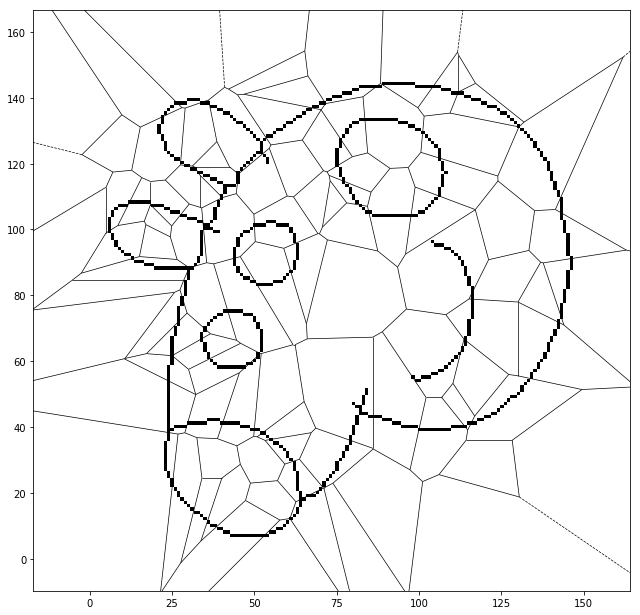

In [88]:
voronoi_plot_2d(peppa_intersect, line_width = 0.7, show_vertices = False, show_points = False)
io.imshow(transform.rotate(invert(skeleton_circle[:, ::-1]), 90))
plt.show()

In [70]:
np.sum(skeleton)

817

In [ ]:
peppa_many_points = gen_best_from_sk(fig_height=150, fig_width=150, n_generations=300, skeleton_points=sk_pts, n_points=500)